# Surface plotting of FPN and clusters within FPN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting, image, surface, datasets
import hcp_utils as hcp
import nibabel as nib

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


## Brain Surface + Total FPN

First lets use the parcellation from hcp.mmp which are the 360 Glasser parcels (+ 20 more that I will ignore). Note, you have to skip the first entry in mmp.label because it's empty. Then extract all the FPN ones and create an array with all zeros except the Parcels I want to plot.

In [3]:
# hcp.mmp is the glasser parcellation
mmp_greyordinates = hcp.mmp.map_all  # an integer array of size 91282, giving the id of each greyordinate
mmp_labels = hcp.mmp.labels
mmp_ids = hcp.mmp.ids

# Set all parcels to 0
Xp = np.zeros(len(hcp.mmp.labels))

# Load the FPN parcellation key file
file_path = '/home/hmueller2/Downloads/FPN_parcellation_cole/CortexSubcortex_ColeAnticevic_NetPartition_wSubcorGSR_parcels_LR_LabelKey.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extract the 'KEYVALUE' (index) of rows that have 7 as 'NETWORKKEY'
glasser_indices_FPN = []
for line in lines[1:362]:  # Skip the header line
    parts = line.strip().split()
    if parts[9] == '7':  # 'NETWORKKEY' is the 10th column (index 9)
        glasser_indices_FPN.append(parts[1])  # 'KEYVALUE' is the 2nd column (index 1)

print(glasser_indices_FPN)

# Set specific parcels to 1, only consider the first 380 rows
for idx in glasser_indices_FPN:
    if int(idx) < 360:
        for i, idx in enumerate(glasser_indices_FPN):
            if int(idx) < 360:
                #Xp[mmp_ids[int(idx)]] = i + 1 # Giving all FPN parcels unique values
                Xp[mmp_ids[int(idx)]] = 1 # Giving all FPN parcels value 1

# Remove the first number from Xp
Xp = Xp[1:380]

print (len(Xp))
print(Xp)

['14', '15', '29', '63', '73', '77', '80', '82', '83', '85', '89', '91', '92', '97', '98', '111', '133', '144', '145', '149', '170', '171', '194', '195', '209', '238', '242', '243', '253', '254', '257', '260', '261', '263', '265', '269', '271', '272', '273', '277', '278', '291', '313', '324', '325', '329', '342', '350', '351', '357']
379
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0.

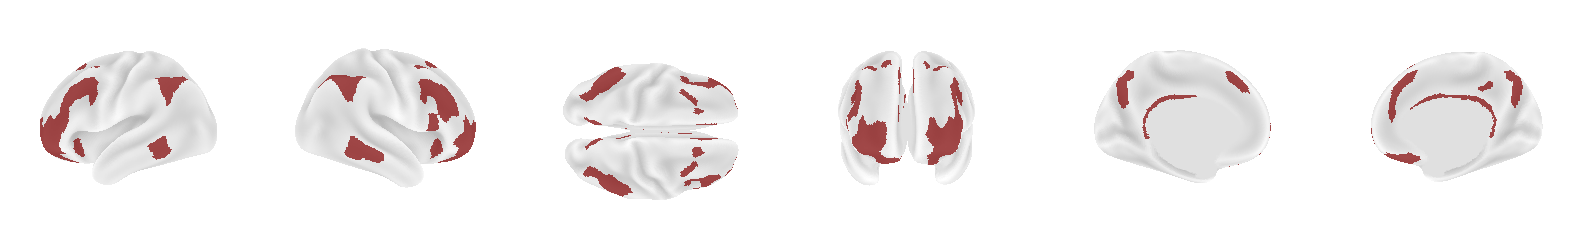

In [4]:
# Map values to surface vertices
surface_data = hcp.unparcellate(Xp, hcp.mmp)
cortex_data = hcp.cortex_data(surface_data)

min_thresh = 0.8
max_thresh = 1
cm = 'OrRd'

fig = plt.figure(figsize=[20, 10])
ax = fig.add_subplot(1, 6, 1, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.inflated, 
    hcp.cortex_data(hcp.unparcellate(Xp, hcp.mmp)), 
    hemi='left', 
    view='lateral', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
ax = fig.add_subplot(1, 6, 2, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.inflated, 
    hcp.cortex_data(hcp.unparcellate(Xp, hcp.mmp)), 
    hemi='right', 
    view='lateral', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
ax = fig.add_subplot(1, 6, 3, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.inflated, 
    hcp.cortex_data(hcp.unparcellate(Xp, hcp.mmp)), 
    view='dorsal', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
ax = fig.add_subplot(1, 6, 4, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.inflated, 
    hcp.cortex_data(hcp.unparcellate(Xp, hcp.mmp)), 
    view='anterior', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
ax = fig.add_subplot(1, 6, 5, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.very_inflated_left, 
    hcp.left_cortex_data(hcp.unparcellate(Xp, hcp.mmp)), 
    hemi='left', 
    view='medial', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc_left, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
ax = fig.add_subplot(1, 6, 6, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.very_inflated_right, 
    hcp.right_cortex_data(hcp.unparcellate(Xp, hcp.mmp)), 
    hemi='right', 
    view='medial', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc_right, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
plt.savefig('FPN_surface_plot.png', dpi=300)
plt.show()

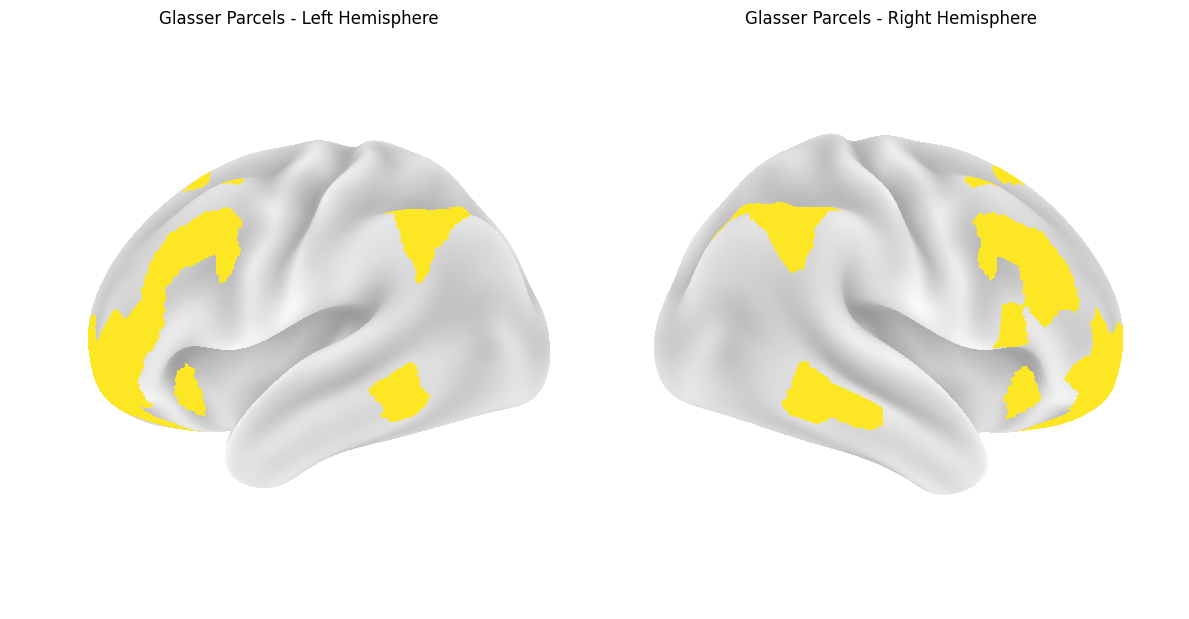

In [31]:
import matplotlib.pyplot as plt
from nilearn import plotting

min_thresh = 1
max_thresh = 2

# Map values to surface vertices
surface_data = hcp.unparcellate(Xp, hcp.mmp)
cortex_data = hcp.cortex_data(surface_data)

# Create a figure
plt.figure(figsize=(12, 8))

# Plot the parcels on left hemisphere
ax1 = plt.subplot(1, 2, 1, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.inflated,  # Use inflated surface
    cortex_data,        # Parcel data mapped to surface
    view='lateral',     # Lateral view
    colorbar=False,     # Show colorbar
    threshold=min_thresh,
    bg_map=hcp.mesh.sulc,  # Background map to show sulci
    axes=ax1,
    cmap='viridis',
    darkness=0.4,
    title="Glasser Parcels - Left Hemisphere"
)

# Plot the parcels on right hemisphere
ax2 = plt.subplot(1, 2, 2, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.inflated,
    cortex_data,
    hemi='right',
    view='lateral',
    colorbar=False,
    threshold=min_thresh,
    bg_map=hcp.mesh.sulc,
    axes=ax2,
    cmap='viridis',
    darkness=0.4,
    title="Glasser Parcels - Right Hemisphere"
)

plt.tight_layout()
plt.show()


## Clusters of FPN

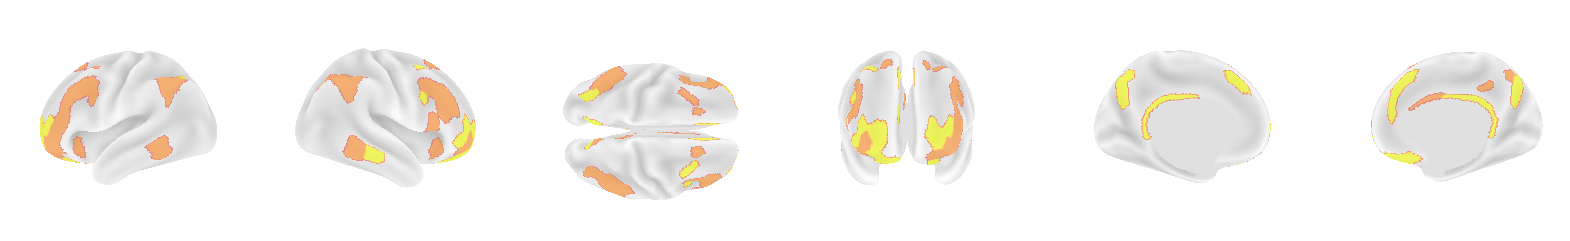

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting

subject = 'sub-14'
run = 'run_06'

min_thresh = 1
max_thresh = 2

# Load the parcel_clusters_df DataFrame
parcel_clusters_path = f'/home/hmueller2/ibc_code/ibc_output_KMeans_onMDS/{run}/parcel-cluster_{subject}.csv'  # Update this path to the actual file location
parcel_clusters_df = pd.read_csv(parcel_clusters_path)

# Initialize Xp with zeros
Xp = np.zeros(len(hcp.mmp.labels))

# Fill Xp using the "index_Xp" and "cluster" columns from parcel_clusters_df
for _, row in parcel_clusters_df.iterrows():
    Xp[int(row['index_Xp'])] = row['cluster']

# Remove the first number from Xp
Xp = Xp[1:380]

#print(Xp)
#print(len(Xp))

# Map values to surface vertices
surface_data = hcp.unparcellate(Xp, hcp.mmp)
cortex_data = hcp.cortex_data(surface_data)

min_thresh = 0.1
max_thresh = 2
cm = 'plasma'

fig = plt.figure(figsize=[20, 10])
ax = fig.add_subplot(1, 6, 1, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.inflated, 
    cortex_data, 
    hemi='left', 
    view='lateral', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
ax = fig.add_subplot(1, 6, 2, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.inflated, 
    cortex_data, 
    hemi='right', 
    view='lateral', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
ax = fig.add_subplot(1, 6, 3, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.inflated, 
    cortex_data, 
    view='dorsal', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
ax = fig.add_subplot(1, 6, 4, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.inflated, 
    cortex_data, 
    view='anterior', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
ax = fig.add_subplot(1, 6, 5, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.very_inflated_left, 
    hcp.left_cortex_data(hcp.unparcellate(Xp, hcp.mmp)), 
    hemi='left', 
    view='medial', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc_left, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
ax = fig.add_subplot(1, 6, 6, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.very_inflated_right, 
    hcp.right_cortex_data(hcp.unparcellate(Xp, hcp.mmp)), 
    hemi='right', 
    view='medial', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc_right, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)

# Save the figure
output_path = f'/home/hmueller2/ibc_code/ibc_output_KMeans_onMDS/{run}/cluster-brain_{subject}.png'
fig.savefig(output_path)

# Plot location of parcel by inputting label name

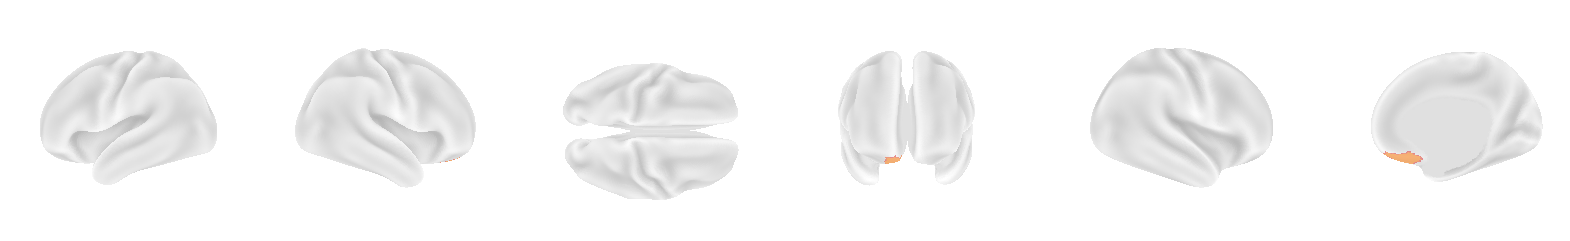

In [ ]:
file_path = '/home/hmueller2/Downloads/FPN_parcellation_cole/CortexSubcortex_ColeAnticevic_NetPartition_wSubcorGSR_parcels_LR_LabelKey.txt'
parcel = "R_OFC"

def plot_parcel_by_label(label_name, file_path, plot_type='surface'):
    """
    Plot the location of a parcel by its GLASSERLABELNAME.
    
    Parameters:
    label_name (str): The name of the label to plot (should end with "_ROI")
    file_path (str): Path to the parcellation key file
    plot_type (str): Type of plot - 'surface' for brain surface view or 'flat' for flatmap
    
    Returns:
    numpy.ndarray: Array with the specific parcel values
    """
    import numpy as np
    import matplotlib.pyplot as plt
    import hcp_utils as hcp

    # Load HCP data
    mmp_greyordinates = hcp.mmp.map_all
    mmp_labels = hcp.mmp.labels
    mmp_ids = hcp.mmp.ids
    
    # Set all parcels to 0
    Xp = np.zeros(len(mmp_labels))
    
    # Load the parcellation key file
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Find the parcel with matching GLASSERLABELNAME
    parcel_id = None
    for line in lines[1:]:  # Skip header
        parts = line.strip().split()
        if len(parts) >= 12 and parts[11] == label_name:
            parcel_id = int(parts[1])  # KEYVALUE is the 2nd column
            break
    
    if parcel_id is None:
        print(f"No parcel found with label name: {label_name}")
        return Xp
    
    # Set the specific parcel to 1
    if parcel_id < 360:
        Xp[mmp_ids[parcel_id]] = 1
        
    # Create a version for plotting
    Xp = Xp[1:380]  # Remove first element as in original code
    
    # Plot the parcel
    # Map values to surface vertices
    surface_data = hcp.unparcellate(Xp, hcp.mmp)
    cortex_data = hcp.cortex_data(surface_data)
    
    # Plot the parcel
    fig = plt.figure(figsize=[20, 10])
    ax = fig.add_subplot(1, 6, 1, projection='3d')
    plotting.plot_surf_stat_map(
        hcp.mesh.inflated, 
        cortex_data, 
        hemi='left', 
        view='lateral', 
        colorbar=False,
        threshold=min_thresh, 
        vmax=max_thresh, 
        bg_map=hcp.mesh.sulc, 
        bg_on_data=True, 
        darkness=0.3, 
        axes=ax, 
        figure=fig, 
        cmap=cm, 
        symmetric_cbar=True
    )
    ax = fig.add_subplot(1, 6, 2, projection='3d')
    plotting.plot_surf_stat_map(
        hcp.mesh.inflated, 
        cortex_data, 
        hemi='right', 
        view='lateral', 
        colorbar=False,
        threshold=min_thresh, 
        vmax=max_thresh, 
        bg_map=hcp.mesh.sulc, 
        bg_on_data=True, 
        darkness=0.3, 
        axes=ax, 
        figure=fig, 
        cmap=cm, 
        symmetric_cbar=True
    )
    ax = fig.add_subplot(1, 6, 3, projection='3d')
    plotting.plot_surf_stat_map(
        hcp.mesh.inflated, 
        cortex_data, 
        view='dorsal', 
        colorbar=False,
        threshold=min_thresh, 
        vmax=max_thresh, 
        bg_map=hcp.mesh.sulc, 
        bg_on_data=True, 
        darkness=0.3, 
        axes=ax, 
        figure=fig, 
        cmap=cm, 
        symmetric_cbar=True
    )
    ax = fig.add_subplot(1, 6, 4, projection='3d')
    plotting.plot_surf_stat_map(
        hcp.mesh.inflated, 
        cortex_data, 
        view='anterior', 
        colorbar=False,
        threshold=min_thresh, 
        vmax=max_thresh, 
        bg_map=hcp.mesh.sulc, 
        bg_on_data=True, 
        darkness=0.3, 
        axes=ax, 
        figure=fig, 
        cmap=cm, 
        symmetric_cbar=True
    )
    ax = fig.add_subplot(1, 6, 5, projection='3d')
    plotting.plot_surf_stat_map(
        hcp.mesh.very_inflated_right, 
        hcp.right_cortex_data(hcp.unparcellate(Xp, hcp.mmp)), 
        hemi='left', 
        view='medial', 
        colorbar=False,
        threshold=min_thresh, 
        vmax=max_thresh, 
        bg_map=hcp.mesh.sulc_left, 
        bg_on_data=True, 
        darkness=0.3, 
        axes=ax, 
        figure=fig, 
        cmap=cm, 
        symmetric_cbar=True
    )
    ax = fig.add_subplot(1, 6, 6, projection='3d')
    plotting.plot_surf_stat_map(
        hcp.mesh.very_inflated_right, 
        hcp.right_cortex_data(hcp.unparcellate(Xp, hcp.mmp)), 
        hemi='right', 
        view='medial', 
        colorbar=False,
        threshold=min_thresh, 
        vmax=max_thresh, 
        bg_map=hcp.mesh.sulc_right, 
        bg_on_data=True, 
        darkness=0.3, 
        axes=ax, 
        figure=fig, 
        cmap=cm, 
        symmetric_cbar=True
    )
    plt.show()

plot_parcel_by_label(f"{parcel}_ROI", file_path)

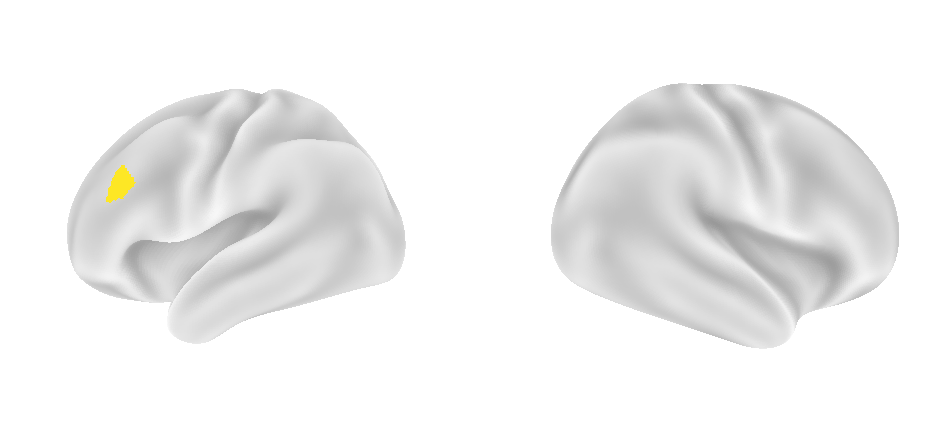

In [48]:
file_path = '/home/hmueller2/Downloads/FPN_parcellation_cole/CortexSubcortex_ColeAnticevic_NetPartition_wSubcorGSR_parcels_LR_LabelKey.txt'

label_name = "L_p9-46v" # SPECIFY THE PARCEL HERE

def plot_parcel_by_label(label_name, file_path):
    import numpy as np
    import matplotlib.pyplot as plt
    import hcp_utils as hcp

    # Load HCP data
    mmp_labels = hcp.mmp.labels
    mmp_ids = hcp.mmp.ids
    
    # Set all parcels to 0
    Xp = np.zeros(len(mmp_labels))
    
    # Load the parcellation key file
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Find the parcel with matching GLASSERLABELNAME
    parcel_id = None
    for line in lines[1:]:  # Skip header
        parts = line.strip().split()
        if len(parts) >= 12 and parts[11] == label_name:
            parcel_id = int(parts[1])  # KEYVALUE is the 2nd column
            break
    
    if parcel_id is None:
        print(f"No parcel found with label name: {label_name}")
        return Xp
    
    # Set the specific parcel to 1
    if parcel_id < 360:
        Xp[mmp_ids[parcel_id]] = 1
        
    # Create a version for plotting
    Xp = Xp[1:380]  # Remove first element as in original code
    
    # Plot the parcel
    # Map values to surface vertices
    surface_data = hcp.unparcellate(Xp, hcp.mmp)
    cortex_data = hcp.cortex_data(surface_data)
    
    # Create a figure
    fig = plt.figure(figsize=(12, 8))

    # Plot the parcels on left hemisphere
    ax1 = plt.subplot(1, 2, 1, projection='3d')
    plotting.plot_surf_stat_map(
        hcp.mesh.inflated,  
        cortex_data,        
        hemi='left',        # SPECIFY
        view='lateral',     # SPECIFY
        colorbar=False,     
        threshold=1,
        bg_map=hcp.mesh.sulc,  
        axes=ax1,
        cmap='viridis',
        darkness=0.4,
        figure=fig
    )
    # Plot the parcels on right hemisphere
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    plotting.plot_surf_stat_map(
        hcp.mesh.very_inflated_right, 
        hcp.right_cortex_data(hcp.unparcellate(Xp, hcp.mmp)), 
        hemi='left', 
        view='medial', 
        colorbar=False,
        threshold=1,
        bg_map=hcp.mesh.sulc_left, 
        axes=ax2,
        cmap='viridis',
        darkness=0.4,
        figure=fig
    )
    plt.show()

plot_parcel_by_label(f"{label_name}_ROI", file_path)
